# Evoluční algoritmy - spojitá a kombinatorická optimalizace

Minule jsem si ukazovali jednoduchý genetický algoritmus, který pracoval s binárními jedinci. Dnes se podíváme na spojité a celočíselné reprezentace jedinců a na další druhy evolučních operátorů.

## Minimalizace Rastrigin funkce

V následujícím cvičení si vyzkoušíme napsat jednoduchý evoluční algoritmus pro minimalizace [Rastrigin funkce](https://en.wikipedia.org/wiki/Rastrigin_function). Tato funkce je typickým příkladem nelineární funkce a běžně se používá při testování chování optimalizačních algoritmů. Nalezení jejího minima je složité, protože obsahuje spoustu lokálních minim. 



In [1]:
import numpy as np
import random
import copy
import math
%matplotlib inline
import matplotlib.pyplot as plt

Nejprve si definujem, jak tedy vypadá ona výše zmíněná funkce, kterou budeme chtít minimalizovat. Potom je třeba si rozmyslet, jak bude vypadat jedinec. Bude to bude floating point vektor, kde hodnoty budou čísla z intervalu [-5.12,5.12]. Pro něj si napíšeme svoje operátory křížení a mutace. Křížení může být aritmetické, například vážený průměr dvou jedinců, nebo strukturální, kdy opět prohazujeme části jedinců. Mutace může být buď netížená, což znamená, že se pro mutovanou pozici vygeneruje nové číslo z daného rozsahu hodnot, nebo zatížená, kdy k hodnotě v jedinci přičtu nějaké číslo z normálního rozdělení s danou odchylkou (například 1) a nulovou střední hodnotou.

In [3]:
# hodnota fitness funkce je vlastne hodnata rastrigin funkce v danem bode
def fitness(individual):
    N = len(individual)
    A = 10
    value = A*N
    for i in range(0,len(individual)):
        value += individual[i]**2 - A*math.cos(2*math.pi*individual[i])
    return -value, 

# nezatizena mutace, ktera pro mutovanou pozici vybere nove cislo z rozsahu hodnot
def mutation_switch(population,individual_mutation_prob=0.2,value_mutation_prob=0.1):
    new_population = []
    for i in range(0,len(population)):
        individual = copy.deepcopy(population[i])
        if random.random()< individual_mutation_prob:
            for i in range(0,len(individual)):
                if random.random() < value_mutation_prob:
                    individual[i] = np.random.uniform(-5.12, 5.12)
        new_population.append(individual)
    return new_population

# krizeni pomoci prumer dvou hodnot
def crossover_mean(population, cross_prob=0.8, alpha=0.25):
    new_population = []
    
    for i in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*i])
        indiv2 = copy.deepcopy(population[2*i+1])
        child1 = indiv1
        child2 = indiv2
        if random.random()<cross_prob:
            for i in range(0, len(indiv1)):
                child1[i] = alpha*indiv1[i] + (1-alpha)*indiv2[i]
                child2[i] = (1-alpha)*indiv1[i] + alpha*indiv2[i]
        new_population.append(child1)
        new_population.append(child2)
        
    return new_population

# definujeme si funkci na na vytvoreni nahodne populace
def random_population(population_size, individual_size):
    population = []
    
    for i in range(0,population_size):
        individual = np.random.uniform(-5.12, 5.12, size=(individual_size,))
        population.append(individual)
        
    return population

# definujeme si turnajovou selekci 
def selection(population,fitness_value, k): 
    new_population = []
    for i in range(0,len(population)):
        individuals = []
        fitnesses = []
        for _ in range(0,k):
            idx = random.randint(0,len(population)-1)
            individuals.append(population[idx])
            fitnesses.append(fitness_value[idx])
        new_population.append(copy.deepcopy(individuals[np.argmax(fitnesses)]))
    return new_population 

Nyní si stejně jako v minulé hodině definujeme celý evoluční algoritmus a pakho pustíme a sledujeme, co se bude dít.

In [4]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value,2)
        children = crossover_mean(parents)
        mutated_children = mutation_switch(children)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness

best fitness:  (-5.479497141048649,)
best individual:  [ 0.9838357  -0.02391599 -0.02635032  0.03452868 -0.01154834 -1.04839222
  0.03923472  0.03691795 -0.03213011  0.93876885]


Text(0.5,0,'Generace')

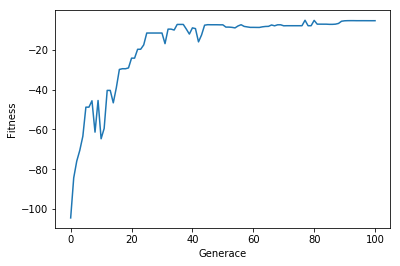

In [5]:
best, population, max_fitness = evolution(population_size=100,individual_size=10,max_generations=100)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')


## Úkol na cvičení

V kódu výše je naprogramovaná nejjednodušší mutace -- nezatížená. Zkuste si napsat alespoň dva další druhy mutace z následujích možností a porovnat, jak se bude evoluční algoritmus chovat.
1. Zatížená mutace, kdy se k hodnotě v jedinci přičítá číslo z normalního rozdělení se střední hodnotou 0 a rozptylem sigma. Sigma se třeba navíc může během každých n generací postupně snižovat. 

2. Mutace s 1/5 pravidlem, která se používá hlavně u evolučních strategií a probíhá podobně jako zatížená mutace: přičítá k hodnotě číslo z náhodného rozdělení s 0 střední hodnotou a rozptylem sigma. Sigma se updatuje v každém kroku následovně: máme jedince a podíváme se, kolik je v populaci jedinců lepších než ten náš. Sigmu pak upravíme pomocí jednoduché rovnice: sigma = sigma * e^(počet_lepších_jedinců/počet_všech_jedinců-1/5).

3. Mutace z diferenciální evoluce, která vybere náhodně pro daného jedince dva další a složku po složce dělá rozdíl jejich hodnot a ten navíc vynásobí nějakou konstantou (třeba 0.8) a to pak přičte k hodnotám v původním jedinci. 

Můžete samozřejmě zkusit vymyslet i nějakou vlastní mutaci, nebo třeba zkusit vypnout mutaci nebo vypnout křížení a sledovat, co se bude s evolucí dít.




## Deap knihovna

Nyní si opět vyzkoušíme přepsat výše zmíněný problém minimalizace Rastrigin funkce pomocí operátorů knihovny DEAP, abychom si lépe vyzkoušeli, jak se s ní pracuje a jak v ní tvořit svoje vlastní operátory, které se nám budou hodit příští hodinu u genetického programování.

In [6]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

Pro jistotu si znovu definujeme vlastní funkce mutace, křížení a fitness funkci.

In [7]:
def rastring_function(individual):
    N = len(individual)
    A = 10
    value = A*N
    for i in range(0,len(individual)):
        value += individual[i]**2 - A*math.cos(2*math.pi*individual[i])
    return value, 

# nezatizena mutace, ktera pro mutovanou pozici vybere nove cislo z rozsahu hodnot
def mutation_switch(individual,indpb):
    for i in range(0,len(individual)):
        if random.random() < indpb:
            individual[i] = np.random.uniform(-5.12, 5.12)
    return individual,

# krizeni pomoci prumer dvou hodnot
def crossover_mean(individual1, individual2, alpha=0.25):
    child1 = individual1
    child2 = individual2
    for i in range(0, len(individual1)):
        child1[i] = alpha*individual1[i] + (1-alpha)*individual2[i]
        child2[i] = (1-alpha)*individual1[i] + alpha*individual2[i]
    return child1, child2

Pak si zadefinujeme nový toolbox a přídáme do něj naše operátory. 

In [8]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 protoze chci minimalizovat funkci
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_float", random.uniform,-5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rastring_function)
toolbox.register("mate", crossover_mean)
toolbox.register("mutate", mutation_switch, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


Na závěr pustíme celou eveluci a můžeme sledovat, jak se nám hledání minima daří, nebo nedaří.

In [9]:
pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100,
                               stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	300   	73.7112	20.6666	20.5028	128.658
1  	245   	55.3994	16.0724	18.6722	98.9749
2  	256   	47.5275	15.5332	6.06697	88.0064
3  	256   	44.6934	16.0617	6.8469 	101.428
4  	242   	39.5106	14.4431	6.8469 	82.3651
5  	255   	38.3885	16.4729	2.28336	84.2986
6  	251   	34.6736	14.3886	2.87469	100.716
7  	229   	30.6406	13.5419	1.69655	78.5201
8  	258   	28.1311	14.355 	1.90245	82.5556
9  	242   	22.5149	12.6319	2.27362	67.4674
10 	253   	15.8142	10.9782	1.8362 	70.1056
11 	261   	9.48509	7.81077	1.35414	49.1818
12 	246   	5.61822	6.71459	1.11079	42.4276
13 	252   	3.36597	5.29673	0.369757	38.3168
14 	257   	3.0071 	6.02436	0.369757	46.0708
15 	251   	3.55997	7.65884	1.00672 	52.7829
16 	247   	3.35388	8.06254	1.00672 	60.5661
17 	258   	2.76366	6.53939	1.00059 	51.9172
18 	248   	2.59997	5.75079	0.99764 	34.2237
19 	245   	3.14383	8.20533	0.99764 	54.4899
20 	259   	2.46232	6.34599	0.99764 	58.7122
21 	252   	2.95527	8.31364	0.99764 	94.4723
22

## Domácí úkol - Batoh

Za domácí úkol budete mít vyřešit pomocí evolučního algoritmu problém batohu. Ten spočívá v tom, že máme batoh kapacity K a N předmětů, každý s cenou c_i a objemem v_i a chceme vybrat takové věci, abychom maximalizovali zisk a zároveň abychom nepřekročili kapacitu batohu. 

Vstupní data máte ve složce *domaci_ukol_data*. Obsahuje čtyři soubory s daty a dva s výsledky. Na první řádce souboru s daty je vždy počet předmětů a kapacita batohu oddělené mezerou, každý další následující řádek obsahuje cenu a objem předmětu taktéž oddělené mezerou. První dva soubory slouží pro snažší odladění evolučního algoritmu a obsahují i k sobě extra soubory s optimálním řešením. Na dalších dvou máte za úkol algoritmus pustit a výsledky na nich naměřené mi poslat. 

Napište tedy nějaký svůj evoluční algoritmus, který bude řešit problém batohu a pusťte ho na vstupních datech. Svůj kód, popis evolučního algoritmu (zvolené evoluční operátory, kódování jedince, atd.) a rozbor výsledků i se zdůvodněním mi pošlete emailem do stanoveného deadline.